<a href="https://colab.research.google.com/github/LohithVarun/CSA4736-DeepLearningPrograms/blob/main/Program-4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

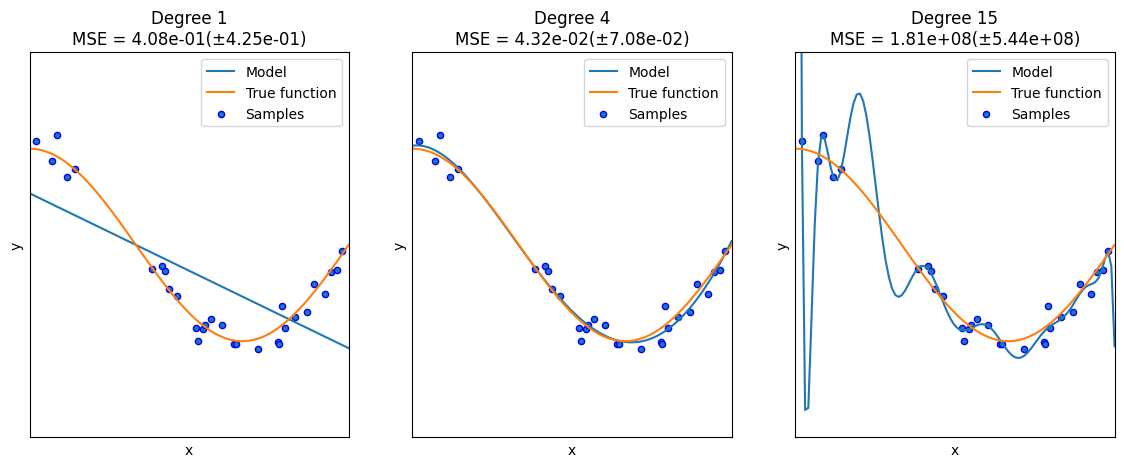

In [10]:
#192224215(R.Lohith Varun)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)
X = np.sort(np.random.rand(30))
y = true_fun(X) + np.random.randn(30) * 0.1
degrees = [1, 4, 15]

plt.figure(figsize=(14, 5))
for i, degree in enumerate(degrees):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    pipeline = Pipeline([
        ("poly_features", PolynomialFeatures(degree=degree, include_bias=False)),
        ("linear_regression", LinearRegression())
    ])
    pipeline.fit(X[:, None], y)

    scores = cross_val_score(pipeline, X[:, None], y, scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, None]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor="b", s=20, label="Samples")
    plt.xlabel("x"), plt.ylabel("y"), plt.xlim((0, 1)), plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title(f"Degree {degree}\nMSE = {-scores.mean():.2e}(±{scores.std():.2e})")
plt.show()